In [ ]:
from google.colab import files
files.upload()   # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n  "username": "project",\r\n  "key": "KGAT_099e98bd3a3e47ec535571ae54f30d1c"\r\n}\r\n'}

In [ ]:
!pip install kaggle librosa numpy matplotlib tensorflow tqdm scikit-learn


In [7]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

print("Kaggle API configured successfully")


Kaggle API configured successfully


In [8]:
!kaggle datasets list | head


ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025                 Spotify Global Music Dataset (2009–2025)               1289021  2025-11-11 09:43:05.933000          16387        421  1.0              
neurocipher/heartdisease                                         Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114         76  1.0              
kundanbedmutha/exam-score-prediction-dataset                     Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        145  1.0          

In [9]:
!kaggle datasets download -d abdulvahap/music-instrunment-sounds-for-classification


Dataset URL: https://www.kaggle.com/datasets/abdulvahap/music-instrunment-sounds-for-classification
License(s): apache-2.0
music-instrunment-sounds-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
!mkdir -p /content/drive/MyDrive/InstruNetAI


In [12]:
!mv music-instrunment-sounds-for-classification.zip /content/drive/MyDrive/InstruNetAI/


In [13]:
!ls /content/drive/MyDrive/InstruNetAI


music-instrunment-sounds-for-classification.zip


In [14]:
!unzip /content/drive/MyDrive/InstruNetAI/music-instrunment-sounds-for-classification.zip \
-d /content/drive/MyDrive/InstruNetAI/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/53.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/530.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/531.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/532.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/533.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/534.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/535.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/536.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/537.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/538.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/539

In [15]:
!ls /content/drive/MyDrive/InstruNetAI/dataset


music_dataset


In [16]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [17]:
DATASET_PATH = "/content/drive/MyDrive/InstruNetAI/dataset"

SAMPLE_RATE = 22050
N_MELS = 128
FIXED_LENGTH = 128   # time dimension for CNN



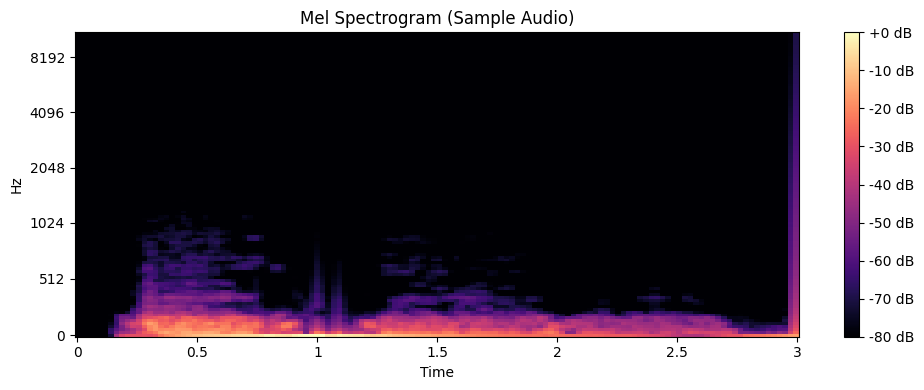

In [21]:
AUDIO_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Electro_Guitar"

audio_file = os.listdir(AUDIO_PATH)[0]
audio_path = os.path.join(AUDIO_PATH, audio_file)

audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)

mel = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=N_MELS
)

mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()


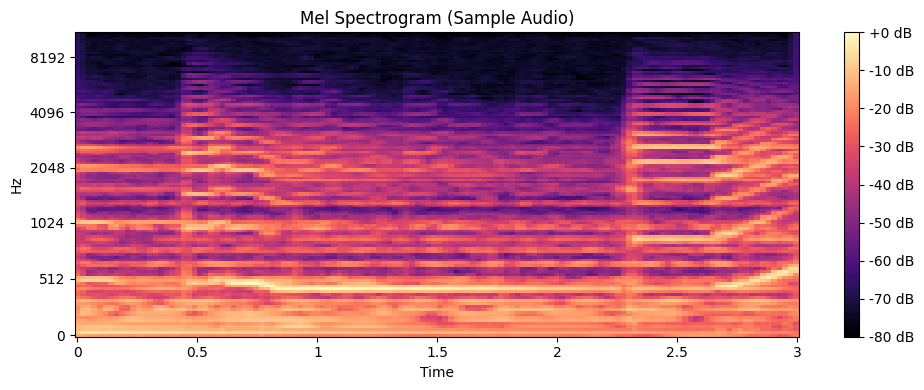

In [22]:
AUDIO_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Electro_Guitar"

audio_file = os.listdir(AUDIO_PATH)[1]
audio_path = os.path.join(AUDIO_PATH, audio_file)

audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)

mel = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=N_MELS
)

mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()


In [24]:
features = []
labels = []

MAIN_DATASET_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset"

for instrument in os.listdir(MAIN_DATASET_PATH):
    instrument_path = os.path.join(MAIN_DATASET_PATH, instrument)

    # skip if not a folder
    if not os.path.isdir(instrument_path):
        continue

    for file in tqdm(os.listdir(instrument_path), desc=instrument):
        file_path = os.path.join(instrument_path, file)

        # ✅ load only audio files
        if not file.lower().endswith(('.wav', '.mp3', '.ogg')):
            continue

        try:
            audio, sr = librosa.load(
                file_path,
                sr=SAMPLE_RATE,
                mono=True
            )

            mel = librosa.feature.melspectrogram(
                y=audio,
                sr=sr,
                n_mels=N_MELS
            )

            mel_db = librosa.power_to_db(mel, ref=np.max)

            # Fix time dimension
            if mel_db.shape[1] < FIXED_LENGTH:
                pad_width = FIXED_LENGTH - mel_db.shape[1]
                mel_db = np.pad(mel_db, ((0, 0), (0, pad_width)))
            else:
                mel_db = mel_db[:, :FIXED_LENGTH]

            features.append(mel_db)
            labels.append(instrument)

        except Exception as e:
            print(f"Skipped file: {file_path}")
            print(e)

print("✅ All valid audio files processed successfully")


vibraphone: 100%|██████████| 506/506 [00:09<00:00, 51.85it/s]

✅ All valid audio files processed successfully


In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(features)
X = X[..., np.newaxis]   # CNN expects 4D input

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y = to_categorical(y_encoded)


In [26]:
np.save("/content/drive/MyDrive/InstruNetAI/X.npy", X)
np.save("/content/drive/MyDrive/InstruNetAI/y.npy", y)
np.save("/content/drive/MyDrive/InstruNetAI/labels.npy", label_encoder.classes_)

print("Saved files:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", label_encoder.classes_)


Saved files:
X shape: (42311, 128, 128, 1)
y shape: (42311, 28)
Classes: ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']
